# Tensor Flow
In this lesson we will learn the basics of deep learning using the TensorFlow package.

<img src="figures/TensorFlow.png" width=300>

## Deep Learning vs. Machine Learning
We use a **machine algorithm** to parse data, learn from that data, and make informed decisions based on what it has learned. Basically, **Deep Learning** is used in layers to create an **Artificial Neural Network** that can learn and make intelligent decisions on its own. We can say **Deep Learning is a sub-field of Machine Learning**.

<img src ='figures/ML_vs_DL.png' width=500>

# Loading Packages & Data

In [1]:
# Let's make sure the libraries are installed
#!pip install  matplotlib
#!pip install  tensorflow
#!pip install  seaborn
#!pip install  pandas
#!pip install  sklearn
#!pip install  keras
#!pip install  scipy
#!pip install  numpy

# Now import the libraries
from pandas import get_dummies
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import keras
import scipy
import numpy
import sys
import csv
import os

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Version
print version of each package

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))
print('tensorflow: {}'.format(tf.__version__))

matplotlib: 3.0.3
sklearn: 0.20.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Keras: 2.2.4
tensorflow: 1.13.1


## Setup

A few tiny adjustments for better **code readability**

In [3]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## TensorFlow
**TensorFlow** is an open-source machine learning library for research and production. TensorFlow offers **APIs** for beginners and experts to develop for desktop, mobile, web, and cloud. See the sections below to get started.[12]

In [ ]:
# Simple hello world using TensorFlow
hello = tf.constant('Hello, TensorFlow!')
# Start tf session
sess = tf.Session()
# Run graph
print(sess.run(hello))
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#please change epochs to 5
model.fit(x_train, y_train, epochs=1)
model.evaluate(x_test, y_test)

## Import the Fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns **four NumPy arrays**:

1. The train_images and train_labels arrays are the training set—the data the model uses to learn.
1. The model is tested against the test set, the test_images, and test_labels arrays.
1. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255.
1. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<img src='figures/fashion-mnist-sprite.png' width=500>

Each image is **mapped** to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Let's explore the format of the dataset before training the model. The following shows there are **60,000** images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:



In [8]:
len(train_labels)


60000

Each label is an integer between 0 and 9:



In [9]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:



In [10]:
test_images.shape


(10000, 28, 28)

And the test set contains 10,000 images labels:



In [11]:
len(test_labels)


10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

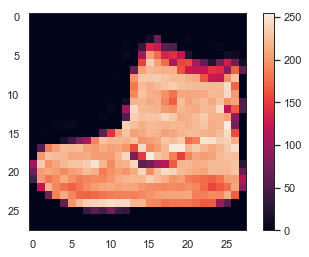

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an** integer to a float,** and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. **Verify** that the data is in the correct format and we're ready to build and train the network.

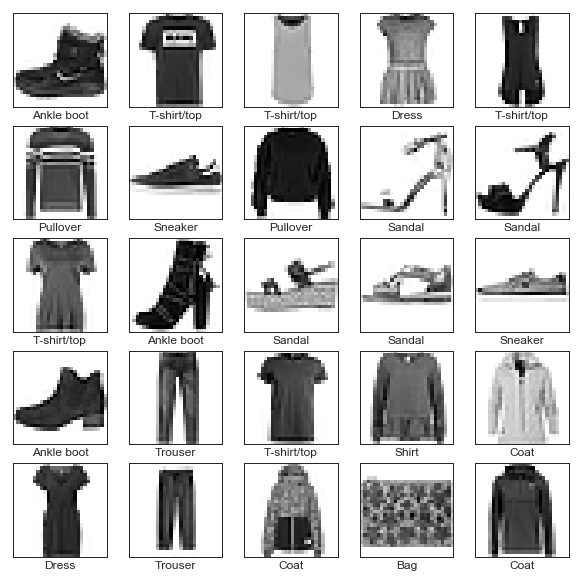

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers
The basic building block of a neural network is the layer. 
**Layers** extract representations from the data fed into them. 
And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. 
Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The **first layer** in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). **The second (and last) layer** is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. **Loss function** —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
1. **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
1. **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data:

In [17]:
#please change epochs to 5
model.fit(train_images, train_labels, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 4s 64us/step - loss: 0.4957 - acc: 0.8271


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8469


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions
With the model trained, we can use it to make predictions about some images.

In [19]:
predictions = model.predict(test_images)


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:



In [20]:
predictions[0]


array([3.6316593e-05, 5.7380967e-06, 3.8284616e-05, 7.7255781e-06,
       1.3505950e-05, 3.0270843e-02, 7.4736221e-05, 1.3712355e-01,
       3.6347499e-03, 8.2879454e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:



In [21]:
np.argmax(predictions[0])


9

We can graph this to look at the full set of 10 channels



In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

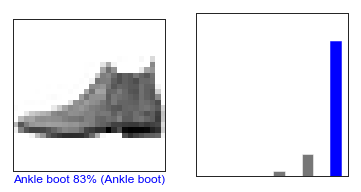

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

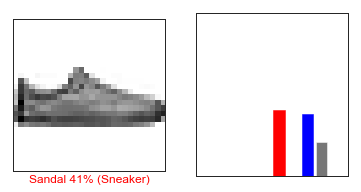

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

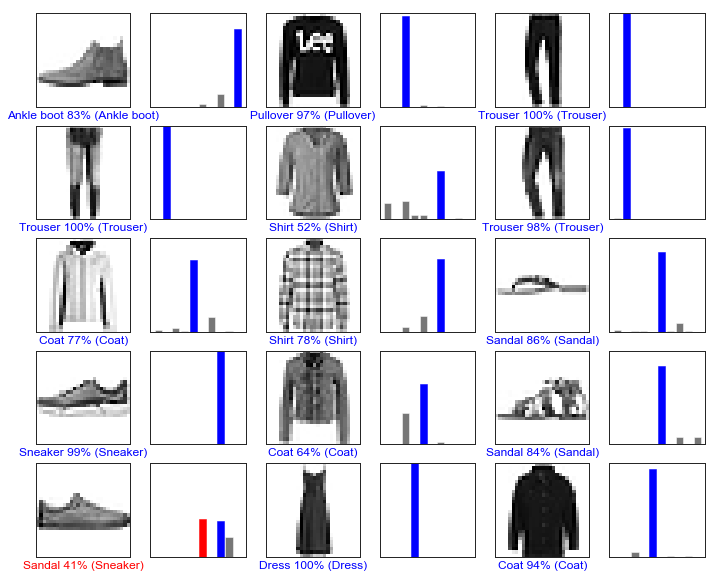

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Finally, use the trained model to make a **prediction** about a single image.

In [26]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


**tf.keras** models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:



In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.6316629e-05 5.7380971e-06 3.8284656e-05 7.7255936e-06 1.3505951e-05
  3.0270847e-02 7.4736301e-05 1.3712353e-01 3.6347522e-03 8.2879460e-01]]


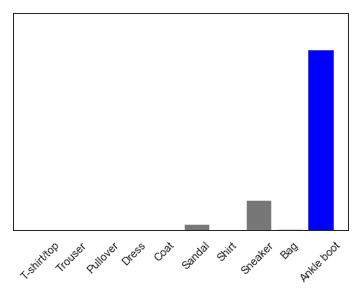

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)